In [1]:
import pickle as pkl
import ipdb
from collections import Counter
import sys
from tqdm import tqdm
import numpy as np
import glob
import json
import ipdb
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

100%|██████████| 440/440 [00:00<00:00, 2039.01it/s]


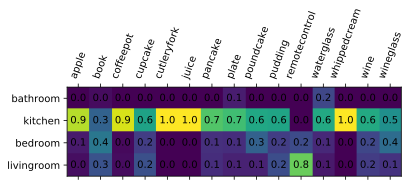

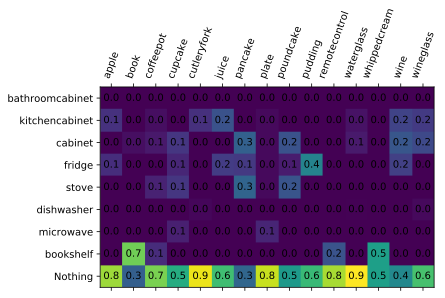

In [5]:
home_path = '../../'

room_objs = ['bathroom', 'kitchen', 'bedroom', 'livingroom']

# Return confusion matrix
def convert_to_grid(containers, object_info, rooms=False, normalize=False):
    name2id = {class_name:i for i, class_name in enumerate(object_info['objects_grab'])}
    if rooms:
        container2id = {class_name:i for i, class_name in enumerate(room_objs)}
    else:
        container2id = {class_name:i for i, class_name in enumerate(object_info['objects_inside']+['Nothing'])}
    ngrab = len(object_info['objects_grab'])
    ninside = len(container2id)
    confmat = np.zeros((ninside, ngrab))
    for objgrab in containers:
        for cont in containers[objgrab]:
            
            idobj = name2id[objgrab]
            idcont = container2id[cont]
            confmat[idcont, idobj] = containers[objgrab][cont]
    if normalize:
        confmat = confmat / (confmat.sum(0)+1e-5)
    return confmat
  
# Count containment
def get_containers(pkl_file):
    rooms = {}
    containers = {}
    for content in tqdm(pkl_file):
        init_graph = content['init_graph']
        
        object_ids_interest = []
        objects_in_container = []
        
        
        id2node = {node['id']: node for node in init_graph['nodes']}
        for edge in init_graph['edges']:
            object_grab = id2node[edge['from_id']]['class_name']
            if object_grab in object_info['objects_grab'] and edge['relation_type'] == 'INSIDE':
                
                object_ids_interest.append(edge['from_id'])
                
                if object_grab not in containers:
                    containers[object_grab] = {'Nothing': 0}
                if object_grab not in rooms:
                    rooms[object_grab] = {}

                container = id2node[edge['to_id']]
                if container['class_name'] in object_info['objects_inside']:
                    # Object in a container
                    if container['class_name'] not in containers[object_grab]:
                        containers[object_grab][container['class_name']] = 0    
                    containers[object_grab][container['class_name']] += 1     
                    objects_in_container.append(edge['from_id'])
                elif container['category'] == 'Rooms':
                    if container['class_name'] not in rooms[object_grab]:
                        rooms[object_grab][container['class_name']] = 0
                    rooms[object_grab][container['class_name']] += 1
                else:
                    # ipdb.set_trace()
                    if container['class_name'] != 'coffeemaker':
                        print("Unrecognized container {} {} {}".format(object_grab, edge['relation_type'], container['class_name']))
        # Mark objects that are not in a container
        objects_not_container = list(set(object_ids_interest) - set(objects_in_container))
        for obj_id_missing in objects_not_container:
            containers[id2node[obj_id_missing]['class_name']]['Nothing'] += 1
    
    return containers, rooms

# from simulation.unity_simulator import comm_unity

with open('object_info_small.json', 'r') as f:
    object_info = json.load(f)
object_info['objects_inside'].append('bookshelf')

# with open('env_task_set_1_full.pik', 'rb') as f:
#     filec = pkl.load(f)
with open('train_env_task_set_20_full.pik', 'rb') as f:
     filec = pkl.load(f)
    

cont, rooms = get_containers(filec)
for use_rooms in [True, False]:
    fig, ax = plt.subplots()
    # use_rooms = True
    if use_rooms:
        confmat = convert_to_grid(rooms, object_info, rooms=use_rooms, normalize=True)
    else:
        confmat = convert_to_grid(cont, object_info, rooms=use_rooms, normalize=True)

    ax.matshow(confmat)
    for (i, j), z in np.ndenumerate(confmat):
        ax.text(j, i, '{:.1f}'.format(z), ha='center', va='center')
    ax.set_xticks(range(len(object_info['objects_grab'])))
    ax.set_xticklabels(object_info['objects_grab'], rotation=70)
    if not use_rooms:
        ax.set_yticklabels(['']+object_info['objects_inside']+['Nothing'])
    else:
        ax.set_yticklabels(['']+room_objs)



100%|██████████| 440/440 [00:00<00:00, 2510.52it/s]


read_book
HERE
HERE
read_book
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
HERE
HERE
read_book
HERE
read_book
HERE
read_book
HERE
HERE
HERE
HERE
read_book
HERE
HERE
HERE
HERE
read_book
HERE
HERE
HERE
HERE
read_book
HERE
read_book
HERE
read_book
HERE
HERE
HERE
HERE
read_book
HERE
HERE
HERE
HERE
read_book
HERE
HERE
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
HERE
HERE
read_book
HERE
read_book
HERE
HERE
HERE
HERE
read_book
HERE
HERE
HERE
read_book
HERE
HERE
HERE
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
HERE
read_book
HERE
HERE
read_book
HERE
read_book
HERE
read_book
HERE
read_book
HERE
read_book
HERE
HERE
read_book


[Text(0, 0, ''),
 Text(0, 0, 'setup_table'),
 Text(0, 0, 'put_fridge'),
 Text(0, 0, 'prepare_food'),
 Text(0, 0, 'read_book'),
 Text(0, 0, 'put_dishwasher')]

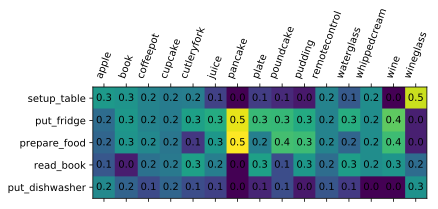

In [8]:
home_path = '../../'

room_objs = ['bathroom', 'kitchen', 'bedroom', 'livingroom']
task_names = ["setup_table", "put_fridge", "prepare_food", "read_book", "put_dishwasher"]

# Return confusion matrix
def convert_to_grid(containers, object_info, normalize=False):
    name2id = {class_name:i for i, class_name in enumerate(object_info['objects_grab'])}
    container2id = {class_name:i for i, class_name in enumerate(task_names)}
    ngrab = len(object_info['objects_grab'])
    ninside = len(container2id)
    confmat = np.zeros((ninside, ngrab))
    
    
    for objgrab in containers:
        for cont in containers[objgrab]:
            idobj = name2id[objgrab]
            idcont = container2id[cont]
            
            confmat[idcont, idobj] = containers[objgrab][cont]
    if normalize:
        confmat = confmat / (confmat.sum(0)+1e-5)
    return confmat
  
# Count containment
def get_containers(pkl_file):
    task_objects = {}
    for content in tqdm(pkl_file):
        init_graph = content['init_graph']
        task_name = content['task_name']
        
        id2node = {node['id']: node for node in init_graph['nodes']}
        if task_name == 'read_book':
            print(task_name)
        for node in init_graph['nodes']:
            object_grab = node['class_name']
            if task_name == 'read_book' and object_grab == 'book':
                print("HERE")
            if object_grab in object_info['objects_grab']:
                
                if object_grab not in task_objects:
                    task_objects[object_grab] = {}
                if task_name not in task_objects[object_grab]:
                    task_objects[object_grab][task_name] = 0
                task_objects[object_grab][task_name] += 1
#                 print(task_objects[object_grab])
                
    return task_objects

with open('object_info_small.json', 'r') as f:
    object_info = json.load(f)
object_info['objects_inside'].append('bookshelf')

with open('train_env_task_set_20_full.pik', 'rb') as f:
    filec = pkl.load(f)
# with open('train_env_set_help.pik', 'rb') as f:
#      filec = pkl.load(f)
    

task_dict = get_containers(filec)
print(task_dict['book'])
confmat = convert_to_grid(task_dict, object_info, normalize=True)
fig, ax = plt.subplots()
ax.matshow(confmat)
for (i, j), z in np.ndenumerate(confmat):
    ax.text(j, i, '{:.1f}'.format(z), ha='center', va='center')
ax.set_xticks(range(len(object_info['objects_grab'])))
ax.set_xticklabels(object_info['objects_grab'], rotation=70)
ax.set_yticklabels(['']+task_names)
# plt.show()


In [ ]:
prohibit_ids = [2,6,7,12,17,20]
def process_scripts(script_folder):
    actions_all = []
    files = glob.glob('{}/logs*'.format(script_folder))
    for filen in tqdm(files):
        index = int(filen.split('/')[-1].split('_')[2])
        if index in prohibit_ids:
            continue
        else:
            with open(filen, 'rb') as f:
                ct = pkl.load(f)
            num_actions = len(ct['action'][0])

            actions_all.append(num_actions)
    return actions_all

In [7]:
actions_fullobs = process_scripts('../../test_results/multiAlice_env_task_set_20_hp_fullobs')
actions_partialobs = process_scripts('../../test_results/multiAlice_env_task_set_20_hp')
actions_full_do = process_scripts('../../test_results/multiAlice_env_task_set_20_hp_full_doors_open')

NameError: name 'process_scripts' is not defined

In [145]:
hist1 = np.histogram(actions_fullobs, normed=True, bins=10, range=(0,200))
hist2 = np.histogram(actions_partialobs, normed=True, bins=10, range=(0,200))
hist3 = np.histogram(actions_full_do, normed=True, bins=10, range=(0,200))


/Users/xavierpuig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.
/Users/xavierpuig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/Users/xavierpuig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

In [143]:
xaxis = [(hist1[1][i]+hist1[1][i+1])/2. for i in range(len(hist1[1])-1)]
xlabel = ['{}-{}'.format(int(hist1[1][i]), int(hist1[1][i+1])) for i in range(len(hist1[1])-1)]
xlabel2 = ['{}'.format(int((hist1[1][i]+hist1[1][i+1])/2.)) for i in range(len(hist1[1])-1)]

Text(0.5, 0, 'Number of steps')

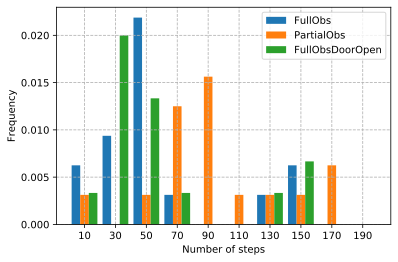

In [154]:
width = 0.45
ind = np.array(range(len(xaxis)))*width*1.2
nc = 3
plt.bar(ind - width/nc, hist1[0], width/nc, label="FullObs")
plt.bar(ind, hist2[0], width/nc, label="PartialObs")
plt.bar(ind + width/nc, hist3[0], width/nc, label="FullObsDoorOpen")
plt.xticks(ind, labels=xlabel2)
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Frequency')
plt.xlabel('Number of steps')

(array([3., 3., 3., 4., 0., 0., 0., 0., 1., 2.]),
 array([ 14. ,  27.3,  40.6,  53.9,  67.2,  80.5,  93.8, 107.1, 120.4,
        133.7, 147. ]),
 <a list of 10 Patch objects>)

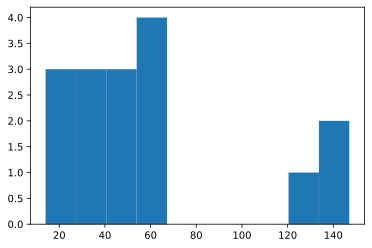

In [48]:
plt.hist(actions_fullobs)